In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/hotel_bookings.csv')


In [2]:
# 1. Shape
print("Shape:", df.shape)

# 2. Data types
print("\nData Types:\n", df.dtypes)

# 3. First & last 5 rows
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

# 4. Basic stats
print("\nSummary:\n", df.describe(include='all'))

Shape: (119390, 32)

Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object


          Missing Values  Percentage
children               4    0.003350
country              488    0.408744
agent              16340   13.686238
company           112593   94.306893


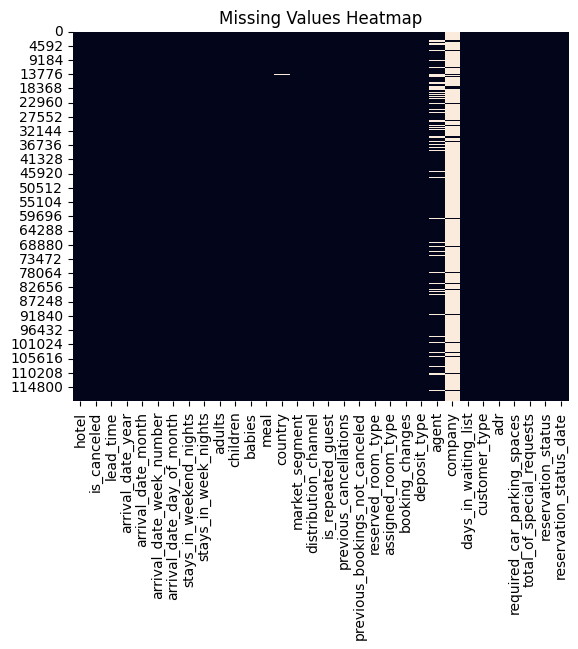

In [4]:
# 1. Missing values count & %
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])

# 2. Visual heatmap

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
#data quality assesment

# 1. Check duplicates
print("Duplicates:", df.duplicated().sum())

# 2. Outliers (visuals later)
# 3. Check categorical inconsistencies
print(df.select_dtypes(include='object').nunique())

# 4. Illogical values example
df[df['adults'] + df['children'].fillna(0) + df['babies'] == 0]


Duplicates: 31994
hotel                        2
arrival_date_month          12
meal                         5
country                    177
market_segment               8
distribution_channel         5
reserved_room_type          10
assigned_room_type          12
deposit_type                 3
customer_type                4
reservation_status           3
reservation_status_date    926
dtype: int64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [6]:
# Handle missing values 

# Children: Replace NaN with 0
df['children'].fillna(0, inplace=True)

# Country: Use mode or 'Unknown'
df['country'].fillna(df['country'].mode()[0], inplace=True)  # or 'Unknown'

# Agent, Company: Replace NaN with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)


C:\Users\janit\AppData\Local\Temp\ipykernel_22460\287459410.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
C:\Users\janit\AppData\Local\Temp\ipykernel_22460\287459410.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [7]:
# Check and remove
duplicates = df.duplicated()
print(f"Duplicates found: {duplicates.sum()}")
df = df[~duplicates]


Duplicates found: 32013


lead_time - Outliers detected: 2396
stays_in_weekend_nights - Outliers detected: 220
stays_in_week_nights - Outliers detected: 1531
adults - Outliers detected: 22887
children - Outliers detected: 8364
babies - Outliers detected: 914
adr - Outliers detected: 2488


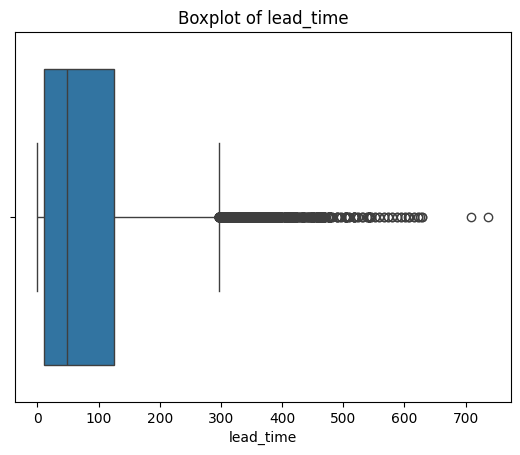

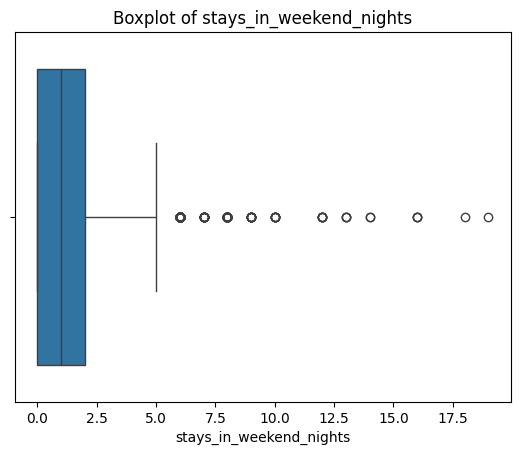

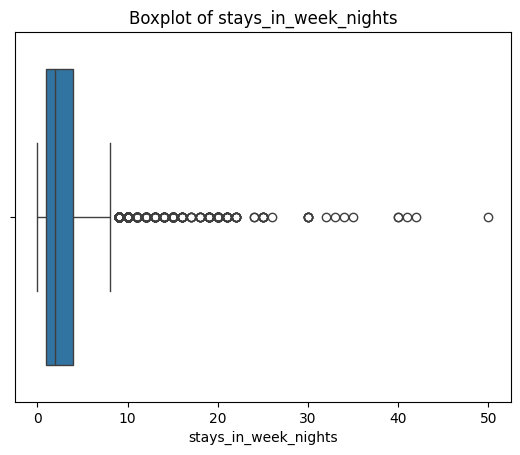

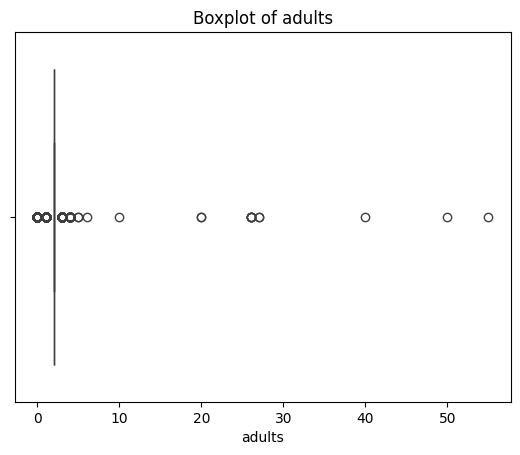

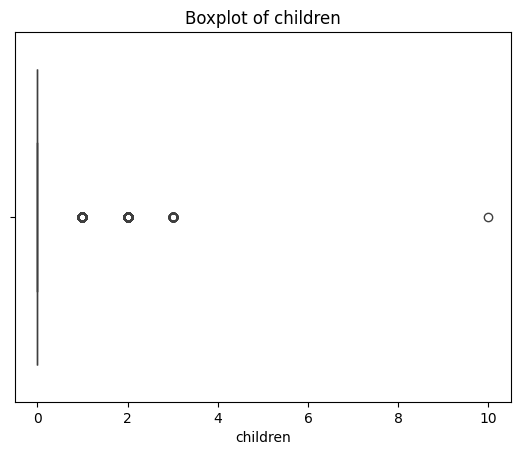

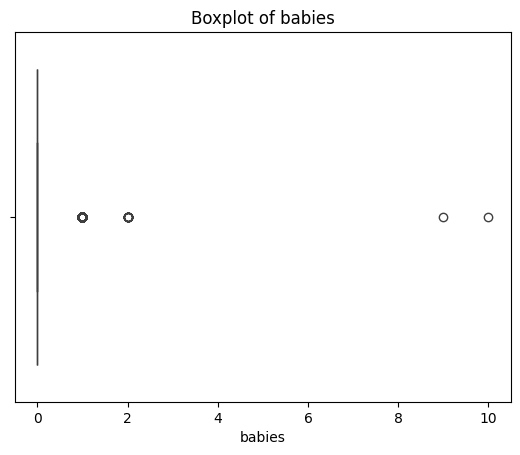

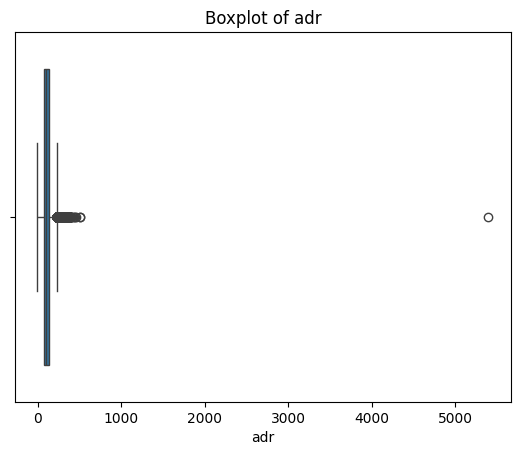

In [9]:
from scipy.stats import zscore

# IQR method
def remove_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - Outliers detected: {outliers.shape[0]}")
    # Option: df = df[~df.index.isin(outliers.index)]

cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr']
for col in cols:
    remove_outliers_iqr(col)

# Boxplots (visual)
for col in cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [10]:
#Fix Data Inconsistencies

# Standardize country codes (example)
df['country'] = df['country'].str.upper()

# Validate dates
print(df[['arrival_date_year', 'arrival_date_month']].drop_duplicates())

# Fix impossible combinations
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]


       arrival_date_year arrival_date_month
0                   2015               July
842                 2015             August
1485                2015          September
2087                2015            October
2835                2015           November
3271                2015           December
3738                2016            January
3864                2016           February
4275                2016              March
4803                2016              April
5521                2016                May
6275                2016               June
6765                2016               July
7270                2016             August
7879                2016          September
8482                2016            October
9177                2016           November
9453                2016           December
9775                2017            January
9978                2017           February
10361               2017              March
10752               2017        

In [11]:
#Data Integrity Checks

# Total guests > 0
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df = df[df['total_guests'] > 0]

# Check arrival date ranges
print(df['arrival_date_year'].unique())


[2015 2016 2017]


In [13]:
df.to_csv('../data/hotel_bookings_cleaned.csv', index=False)
